<a href="https://colab.research.google.com/github/sultanardian/kuliah/blob/main/data%20visualitation/Data_Visualitation_A_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Supermarket Transactions.xlsx', sheet_name = 'Data')
df.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,M,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2011-12-20,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2011-12-21,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2011-12-21,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2011-12-22,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

df['Day'] = df['Purchase Date'].dt.day
df['Month'] = df['Purchase Date'].dt.month
df['Year'] = df['Purchase Date'].dt.year

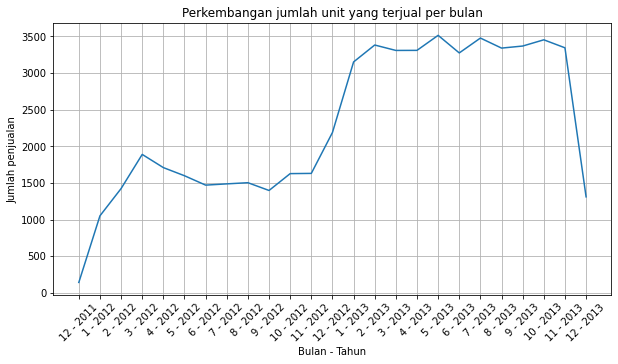

In [ ]:
grouped_units_sold_per_month = df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()
grouped_units_sold_per_month['Year'] = grouped_units_sold_per_month['Year'].apply(lambda x : str(x))
grouped_units_sold_per_month['Month'] = grouped_units_sold_per_month['Month'].apply(lambda x : str(x))
grouped_units_sold_per_month['Month - Year'] = grouped_units_sold_per_month['Month'] + ' - ' + grouped_units_sold_per_month['Year']

plt.figure(figsize = (10, 5))
plt.plot(grouped_units_sold_per_month['Month - Year'], grouped_units_sold_per_month['Units Sold'])
plt.title('Perkembangan Jumlah Unit yang Terjual Per Bulan')
plt.xlabel('Bulan - Tahun')
plt.ylabel('Jumlah penjualan')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

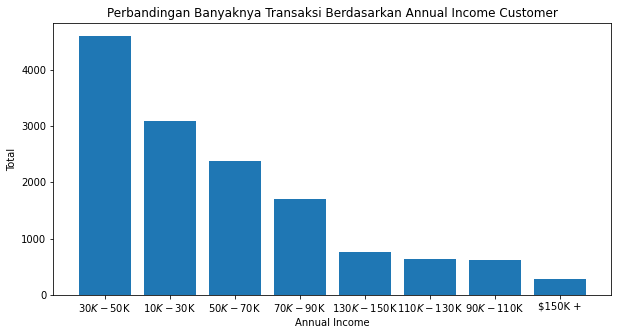

In [ ]:
grouped_annual_income = df.groupby('Annual Income')['Customer ID'].count().sort_values(ascending = False).reset_index()

plt.figure(figsize = (10, 5))
plt.bar(grouped_annual_income['Annual Income'], grouped_annual_income['Customer ID'])
plt.title('Perbandingan Banyaknya Transaksi Berdasarkan Annual Income Customer')
plt.xlabel('Annual Income')
plt.ylabel('Total')
plt.show()

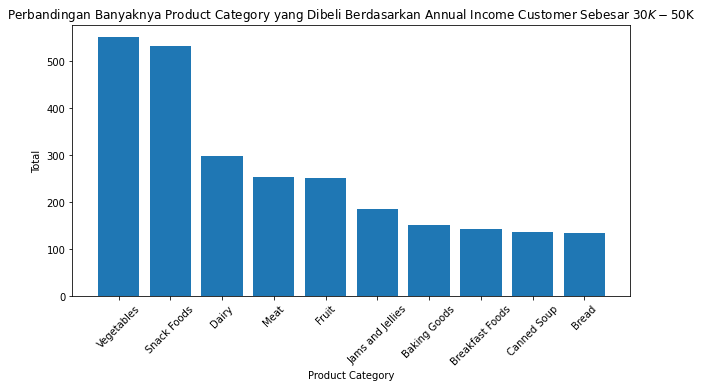

In [ ]:
grouped_product_category_by_higher_freq_of_annual_income = df[df['Annual Income'] == '$30K - $50K'].groupby('Product Category')['Customer ID'].count().sort_values(ascending = False).reset_index()

plt.figure(figsize = (10, 5))
plt.bar(grouped_product_category_by_higher_freq_of_annual_income['Product Category'].head(10), grouped_product_category_by_higher_freq_of_annual_income['Customer ID'].head(10))
plt.title('Perbandingan Banyaknya Product Category yang Dibeli Berdasarkan Annual Income Customer Sebesar $30K - $50K')
plt.xlabel('Product Category')
plt.ylabel('Total')
plt.xticks(rotation = 45)
plt.show()

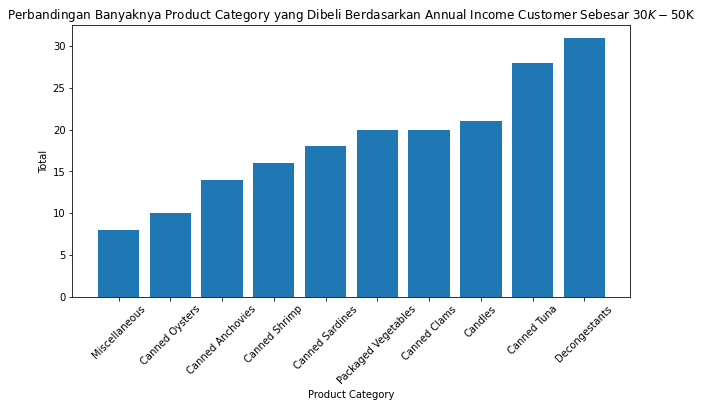

In [ ]:
grouped_product_category_by_higher_freq_of_annual_income = df[df['Annual Income'] == '$30K - $50K'].groupby('Product Category')['Customer ID'].count().sort_values().reset_index()

plt.figure(figsize = (10, 5))
plt.bar(grouped_product_category_by_higher_freq_of_annual_income['Product Category'].head(10), grouped_product_category_by_higher_freq_of_annual_income['Customer ID'].head(10))
plt.title('Perbandingan Banyaknya Product Category yang Dibeli Berdasarkan Annual Income Customer Sebesar $30K - $50K')
plt.xlabel('Product Category')
plt.ylabel('Total')
plt.xticks(rotation = 45)
plt.show()